In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from sklearn import cluster

In [2]:
column_names = ("Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Wilderness_Area_01","Wilderness_Area_02","Wilderness_Area_03","Wilderness_Area_04","Soil_Type_01","Soil_Type_02","Soil_Type_03","Soil_Type_04","Soil_Type_05","Soil_Type_06","Soil_Type_07","Soil_Type_08","Soil_Type_09","Soil_Type_10","Soil_Type_11","Soil_Type_12","Soil_Type_13","Soil_Type_14","Soil_Type_15","Soil_Type_16","Soil_Type_17","Soil_Type_18","Soil_Type_19","Soil_Type_20","Soil_Type_21","Soil_Type_22","Soil_Type_23","Soil_Type_24","Soil_Type_25","Soil_Type_26","Soil_Type_27","Soil_Type_28","Soil_Type_29","Soil_Type_30","Soil_Type_31","Soil_Type_32","Soil_Type_33","Soil_Type_34","Soil_Type_35","Soil_Type_36","Soil_Type_37","Soil_Type_38","Soil_Type_39","Soil_Type_40","Cover_Type"
)

In [3]:
soil = pd.read_table("covtype.data", sep=",", names=column_names)

In [4]:
# Copy first 50,000 rows into a new dataframe
soil2 = soil.copy(deep=True)
soil2.drop(soil2.index[50000:], inplace=True)

In [5]:
soil2.shape

(50000, 55)

In [6]:
soil2.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [7]:
# Copy dataframe
df_tr = soil2

In [8]:
clmns = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am', 'Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']
df_tr_std = stats.zscore(df_tr[clmns])

['Elevation', 'Aspect']
   cluster_errors  num_clusters
0   100000.000000             1
1    61607.000149             2
2    39520.561195             3
3    29826.869064             4
4    24171.547162             5
5    19996.027299             6
6    16882.509225             7
7    14073.749503             8
8    12072.063413             9
9    10986.250508            10
cluster        0      1     2    3     4     5     6
Cover_Type                                          
1           1180   1145  2086    1  4634     0  1105
2            501  12074  6854  193  4392    77  4702
3              0    518    33  779     0   753    77
4              0      9     0  413     0  1738     0
5              0   1425   462   15    67    26   421
6              0    494     0  850     0   610   206
7            893      0    95    0  1172     0     0


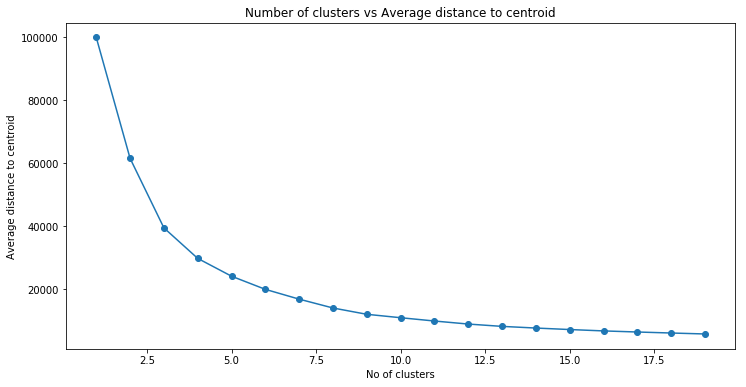

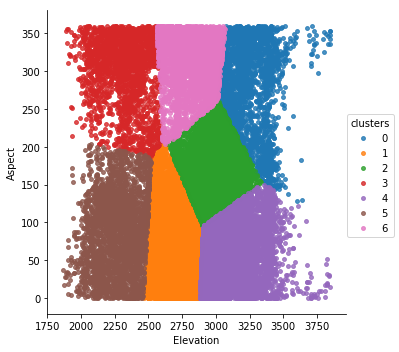

In [17]:
# Elevation and Aspect

df_tr = soil2

current_clmns = []

col1 = 0 #Elevation
col2 = 1 #Aspect

current_clmns.append(clmns[col1])
current_clmns.append(clmns[col2])

print (current_clmns)

df_tr_std = stats.zscore(df_tr[current_clmns])

#Elbow curve

cluster_range  = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( df_tr_std )
  cluster_errors.append( clusters.inertia_ )

#Print Elbow curve table
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
print (clusters_df[0:10])

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title("Number of clusters vs Average distance to centroid")
plt.xlabel('No of clusters')
plt.ylabel('Average distance to centroid')

# Cluster the data based on best k
kmeans = KMeans(n_clusters=7, random_state=5).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to original data
df_tr['clusters'] = labels

#Add the column into our list
current_clmns.extend(['clusters'])

#Lets analyze the clusters
#Find out how many instances in cluster
#print (df_tr[current_clmns].groupby(['clusters']).mean())

# Plot the graph
sns.lmplot(current_clmns[0], current_clmns[1], 
       data=df_tr, 
       fit_reg=False, 
       hue="clusters",  
       scatter_kws={"marker": "D", 
                    "s": 15})

# Confusion Matrix Result

model = cluster.KMeans(n_clusters = 7, random_state=5)

fit = model.fit(df_tr_std)
df_tr["cluster"] = fit.predict(df_tr_std)

#Then, we create the following two columns, to compare the predicted labels with the target labels. 
df_tr["c"] = "count"

# The following line includes three parts: we first select the cluster, target, and c columns. Then, we group them by the cluster and target columns. Finally, we aggregate the rows of the group with a simple count function. 

# Print confusion matrix
clustering_result = df_tr[["cluster", "Cover_Type", "c"]].groupby(["cluster", "Cover_Type"]).agg("count")
confusion_matrix = (clustering_result.reset_index().pivot_table(index='Cover_Type', columns='cluster', values='c', aggfunc='sum', fill_value=0))
print (confusion_matrix)


['Aspect', 'Slope']
   cluster_errors  num_clusters
0   100000.000000             1
1    60986.235764             2
2    36191.575145             3
3    28115.566686             4
4    22258.322882             5
5    18058.976359             6
6    15555.717123             7
7    13660.979126             8
8    11933.997167             9
9    10927.425034            10
cluster        0     1     2     3     4     5     6
Cover_Type                                          
1           1571  1087  2144   718  2538   544  1549
2           3845  3749  8388  1639  5002  1348  4822
3            183   367   132   524   260   549   145
4            229   301   284   780   307   110   149
5            293   433   446   616   319   104   205
6            332   108   155   394   412   661    98
7            406   295   307   236   501   133   282


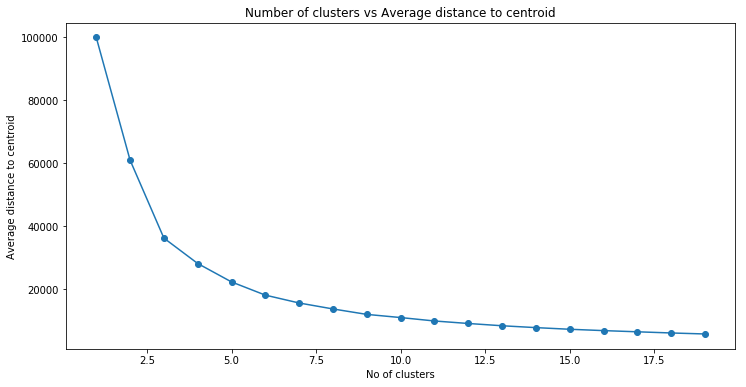

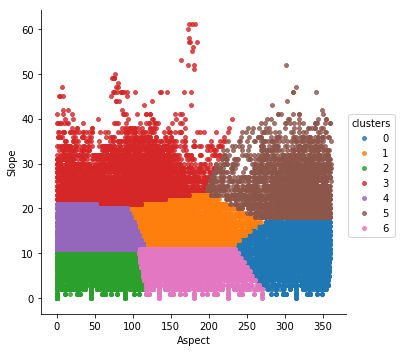

In [18]:
# Aspect & Slope

df_tr = soil2

current_clmns = []

col1 = 1 #Aspect
col2 = 2 #Slope

current_clmns.append(clmns[col1])
current_clmns.append(clmns[col2])

print (current_clmns)

df_tr_std = stats.zscore(df_tr[current_clmns])

#Elbow curve

cluster_range  = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( df_tr_std )
  cluster_errors.append( clusters.inertia_ )

#Print Elbow curve table
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
print (clusters_df[0:10])

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title("Number of clusters vs Average distance to centroid")
plt.xlabel('No of clusters')
plt.ylabel('Average distance to centroid')

# Cluster the data based on best k
kmeans = KMeans(n_clusters=7, random_state=5).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to original data
df_tr['clusters'] = labels

#Add the column into our list
current_clmns.extend(['clusters'])

#Lets analyze the clusters
#Find out how many instances in cluster
#print (df_tr[current_clmns].groupby(['clusters']).mean())

# Plot the graph
sns.lmplot(current_clmns[0], current_clmns[1],
       data=df_tr, 
       fit_reg=False, 
       hue="clusters",  
       scatter_kws={"marker": "D", 
                    "s": 15})

# Confusion Matrix Result

model = cluster.KMeans(n_clusters = 7, random_state=5)

fit = model.fit(df_tr_std)
df_tr["cluster"] = fit.predict(df_tr_std)

#Then, we create the following two columns, to compare the predicted labels with the target labels. 
df_tr["c"] = "count"

# The following line includes three parts: we first select the cluster, target, and c columns. Then, we group them by the cluster and target columns. Finally, we aggregate the rows of the group with a simple count function. 

# Print confusion matrix
clustering_result = df_tr[["cluster", "Cover_Type", "c"]].groupby(["cluster", "Cover_Type"]).agg("count")
confusion_matrix = (clustering_result.reset_index().pivot_table(index='Cover_Type', columns='cluster', values='c', aggfunc='sum', fill_value=0))
print (confusion_matrix)


In [ ]:
# Elevation & Horizontal_Distance_To_Hydrology

df_tr = soil2

current_clmns = []

col1 = 0 
col2 = 3 

current_clmns.append(clmns[col1])
current_clmns.append(clmns[col2])

print (current_clmns)

df_tr_std = stats.zscore(df_tr[current_clmns])

#Elbow curve

cluster_range  = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( df_tr_std )
  cluster_errors.append( clusters.inertia_ )

#Print Elbow curve table
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
print (clusters_df[0:10])

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.title("Number of clusters vs Average distance to centroid")
plt.xlabel('No of clusters')
plt.ylabel('Average distance to centroid')

# Cluster the data based on best k
kmeans = KMeans(n_clusters=7, random_state=5).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to original data
df_tr['clusters'] = labels

#Add the column into our list
current_clmns.extend(['clusters'])

#Lets analyze the clusters
#Find out how many instances in cluster
#print (df_tr[current_clmns].groupby(['clusters']).mean())

# Plot the graph
sns.lmplot(current_clmns[0], current_clmns[1],
       data=df_tr, 
       fit_reg=False, 
       hue="clusters",  
       scatter_kws={"marker": "D", 
                    "s": 15})

# Confusion Matrix Result

model = cluster.KMeans(n_clusters = 7, random_state=5)

fit = model.fit(df_tr_std)
df_tr["cluster"] = fit.predict(df_tr_std)

#Then, we create the following two columns, to compare the predicted labels with the target labels. 
df_tr["c"] = "count"

# The following line includes three parts: we first select the cluster, target, and c columns. Then, we group them by the cluster and target columns. Finally, we aggregate the rows of the group with a simple count function. 

# Print confusion matrix
clustering_result = df_tr[["cluster", "Cover_Type", "c"]].groupby(["cluster", "Cover_Type"]).agg("count")
confusion_matrix = (clustering_result.reset_index().pivot_table(index='Cover_Type', columns='cluster', values='c', aggfunc='sum', fill_value=0))
print (confusion_matrix)

['Elevation', 'Horizontal_Distance_To_Hydrology']
